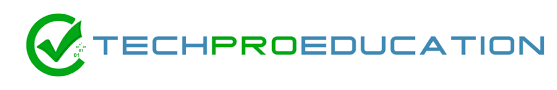

<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [218]:

import numpy as np
import pandas as pd



In [219]:

import seaborn as sb
import matplotlib as plm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [220]:
df = pd.read_csv("C:/Users/seyma/OneDrive/Pulpit/TECHPRO/DATA VISUALIZATION/PROJECT/PROJECT 1/store_sharing.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [221]:
df.duplicated().value_counts()

False    17414
dtype: int64

In [222]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


In [223]:

#df['season'] = df.season.map(season_mapping) #for showing name of seasons on graphs

In [224]:
season_mapping = {0 : 'Spring',
                  1 : "Summer",
                  2 : "Fall",
                  3 : "Winter"}

df['season'] = df.season.map(season_mapping)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 1.3+ MB


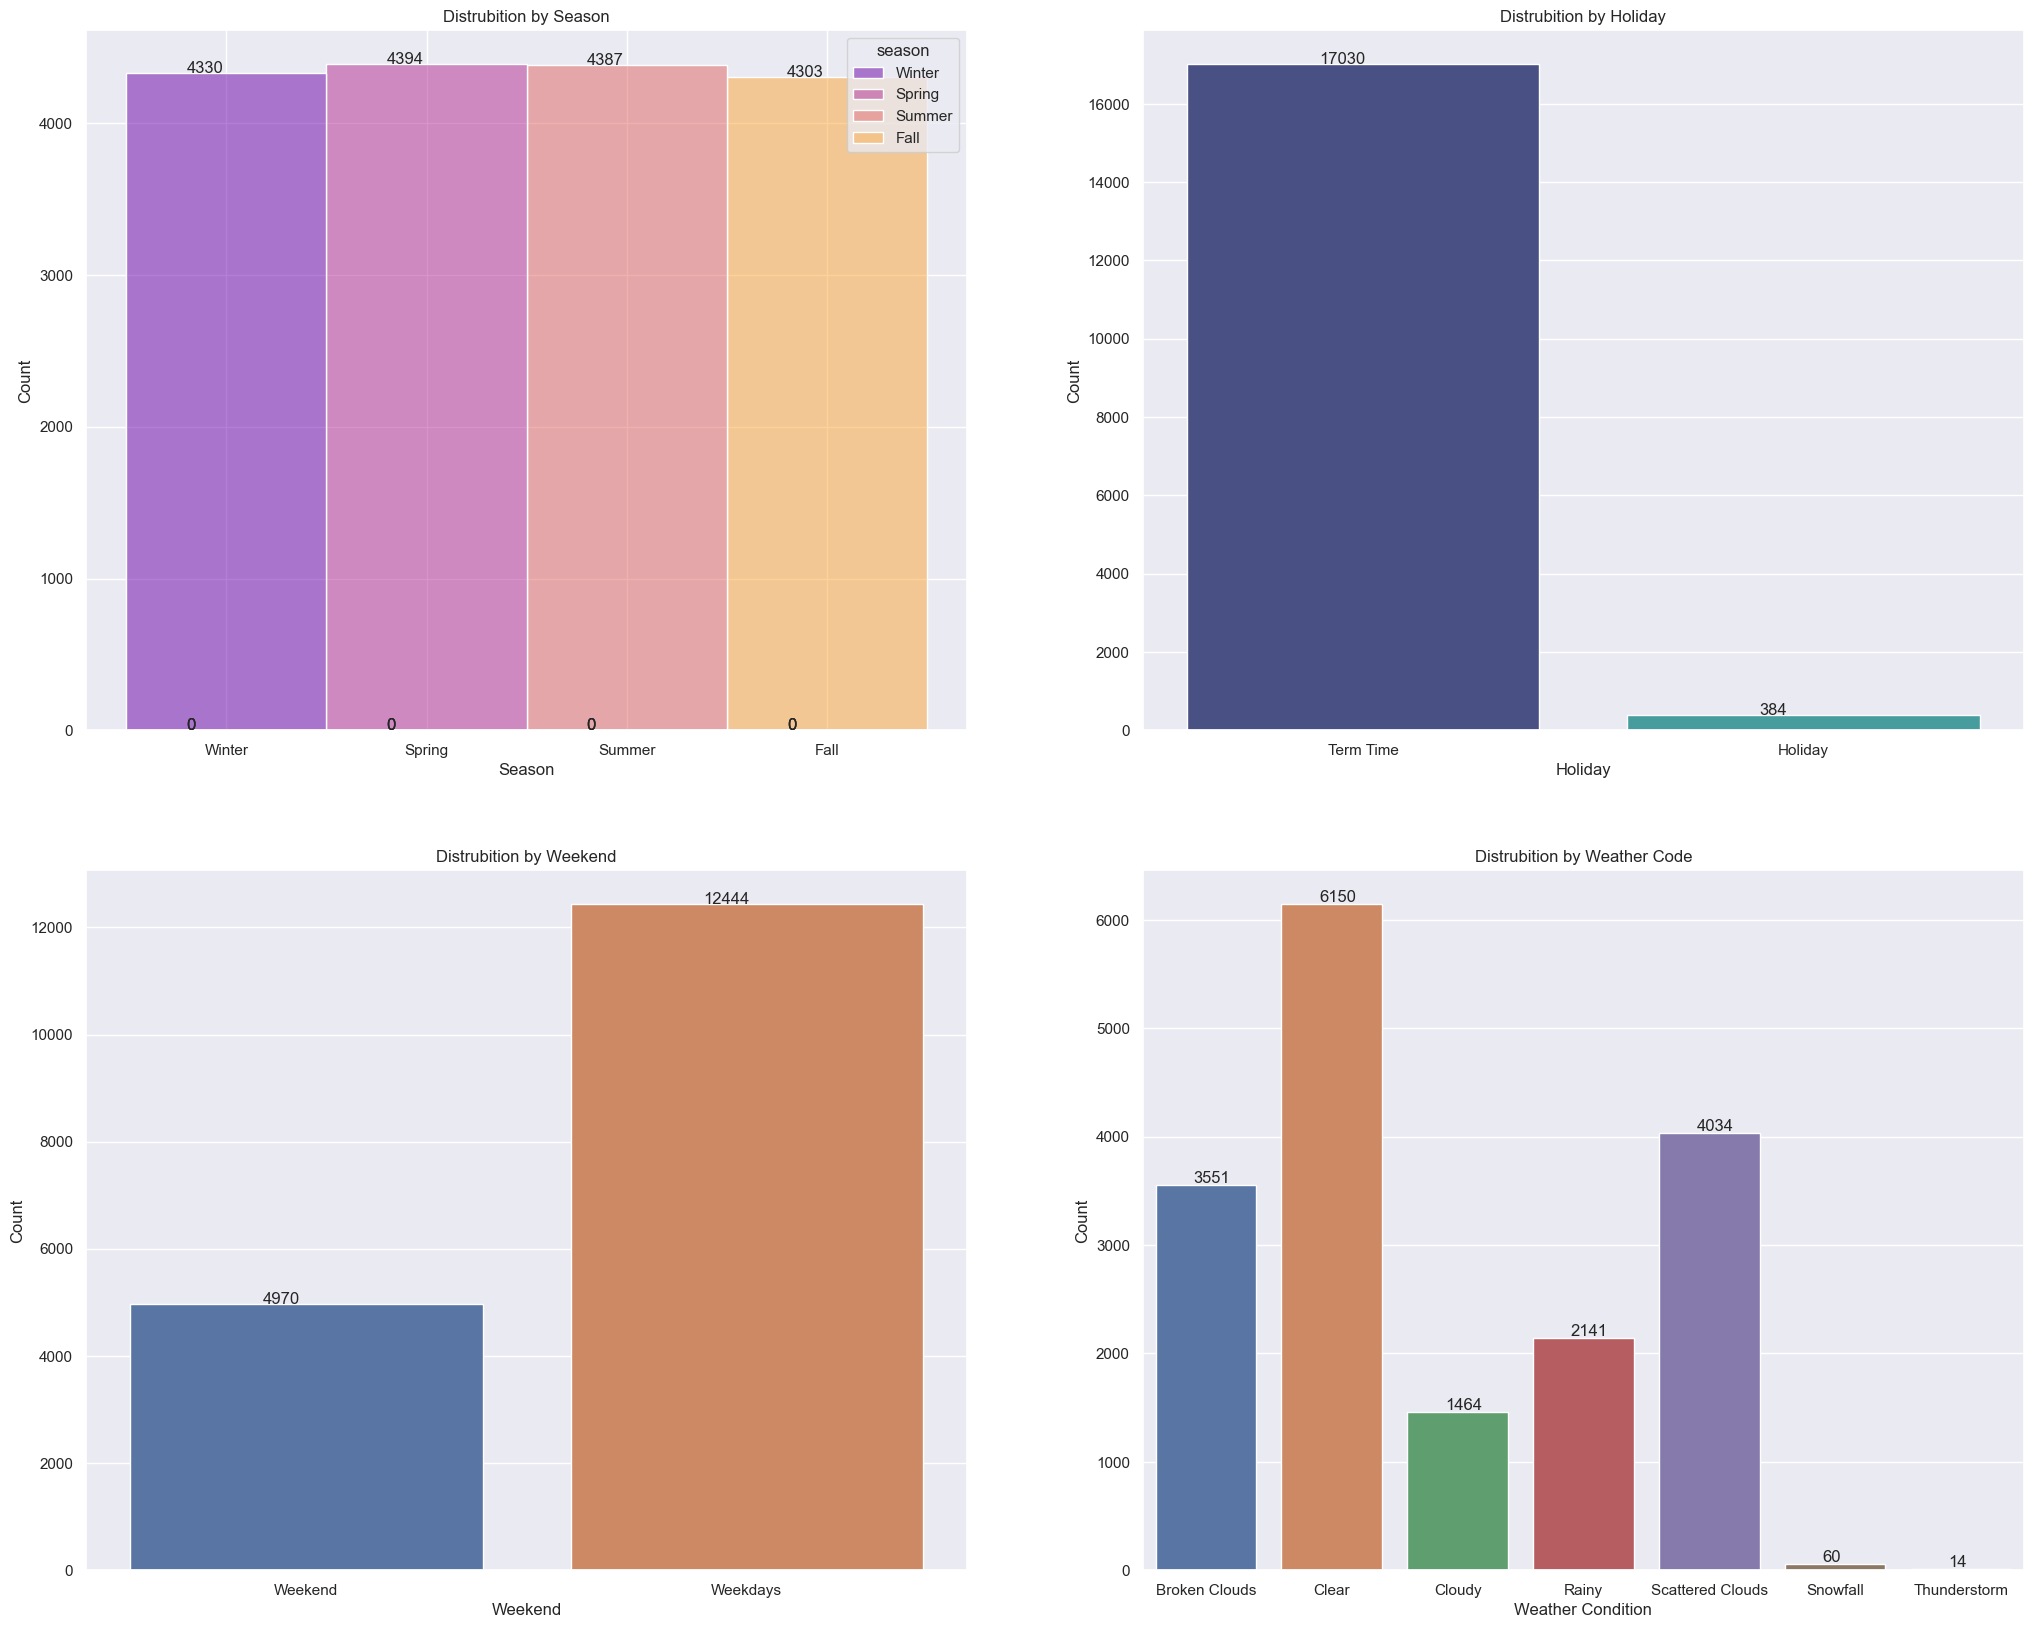

In [226]:
fig, ax = plt.subplots(2, 2, figsize=(25, 20))
sns.set_theme(style="darkgrid")

ax1 = sns.histplot(data=df,
                   x=df.season,
                   hue=df.season,
                   palette='plasma',
                   ax=ax[0, 0])


ax1.set(xlabel='Season', ylabel='Count', title="Distrubition by Season")

for p in ax1.patches:
    ax1.annotate((p.get_height()), (p.get_x() + 0.3, p.get_height() + 0.5));


ax2 = sns.countplot(data=df, palette ='mako',
                    x=df.is_holiday.apply(lambda x: "Holiday" if x == 1 else 'Term Time'),
                    ax=ax[0, 1])

for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x() + 0.3, p.get_height()));


ax2.set(xlabel='Holiday', ylabel='Count', title="Distrubition by Holiday")

ax3 = sns.countplot(data=df,
                    x=df.is_weekend.apply(lambda x: 'Weekend' if x == 1 else 'Weekdays'),
                    ax=ax[1, 0])

ax3.set(xlabel='Weekend', ylabel='Count', title="Distrubition by Weekend")

for p in ax3.patches:
    ax3.annotate(p.get_height(), (p.get_x() + 0.3, p.get_height()));

ax4 = sns.countplot(data=df,
                    x=df.weather_code.apply(lambda x: 'Clear' if x == 1 else
                                       ('Scattered Clouds' if x == 2 else
                                        ("Broken Clouds" if x == 3 else
                                         ('Cloudy' if x == 4 else
                                          ('Rainy' if x == 7 else
                                           ('Thunderstorm' if x == 10 else
                                            ('Snowfall' if x == 26 else
                                             ("Freezing Fog" if x == 94 else
                                              None)))))))),
                    ax=ax[1, 1])


ax4.set(xlabel='Weather Condition', ylabel='Count', title="Distrubition by Weather Code")



for p in ax4.patches:
    ax4.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+20))
    
plt.show()

In [227]:
## We observe that the weather conditions are more effective than the effect on the season
## when we take the average, the daily bike shares are almost the same on weekends and weekdays. 
# (weekday daily-2.488
# (weekend daily- 2.485)


# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [228]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season           object
dtype: object

In [229]:
df.timestamp = pd.to_datetime(df.timestamp)
df.set_index(df.timestamp, inplace=True)

In [230]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                  object
dtype: object

In [231]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,Winter
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,Winter
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,Winter
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,Winter
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,Winter
...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,Winter
2017-01-03 20:00:00,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,Winter
2017-01-03 21:00:00,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,Winter


<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

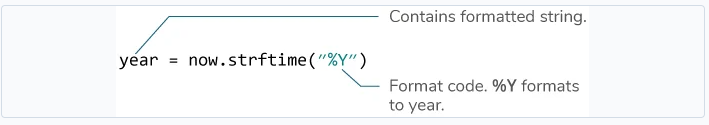

In [232]:
# strftime() metodu direktifler aracılığı ile tarih ve saat formatlarını yönetebilmemizi ve bu işlem sonucunda tarih nesnesinin bir karakter dizisine dönüştürülmesini sağlar.

In [233]:
#you can use strftime('%Y-%m') for year_mount

In [239]:
df["year_month"] = df.index.strftime('%Y-%m')
df["year"] = df.index.year
df["month"] = df.index.strftime('%b')
df["day_of_month"] = df.index.day
df["day_of_week"] = df.index.strftime('%a')
df['hour'] = df.index.hour



df['year'] = df.index.year

df['year_and_month'] = df.index.strftime('%Y-%m')

df["hour"] = df.index.hour

In [240]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour,year_and_month
timestamp,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,Winter,2015-01,2015,Jan,4,Sun,0,2015-01
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,Winter,2015-01,2015,Jan,4,Sun,1,2015-01
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,Winter,2015-01,2015,Jan,4,Sun,2,2015-01
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,Winter,2015-01,2015,Jan,4,Sun,3,2015-01
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,Winter,2015-01,2015,Jan,4,Sun,4,2015-01


<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

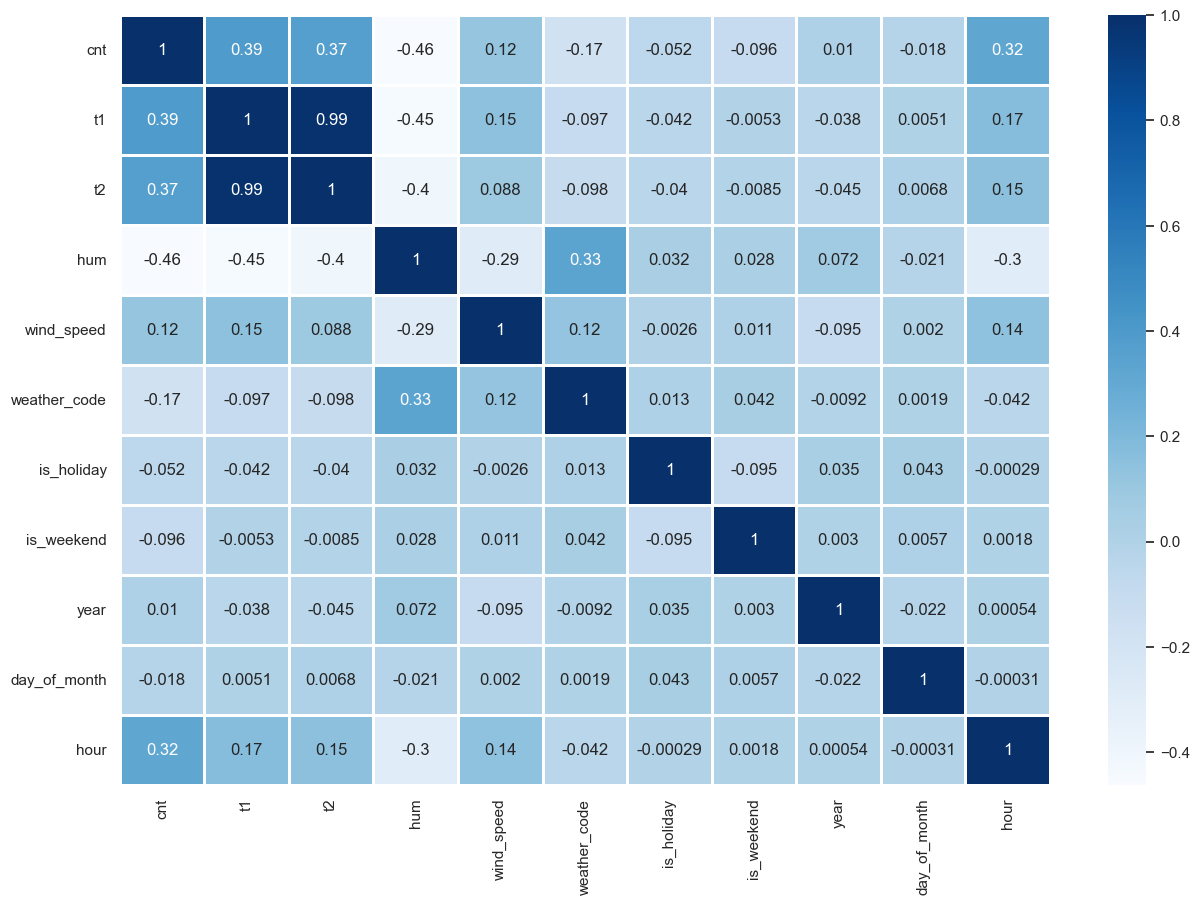

In [241]:
plt.figure(figsize=(15, 10))

sns.heatmap(df.corr(),annot=True,linewidths=0.75,cmap='Blues');

In [242]:
## humudity, t1 and t2  factors  have correlation with bike demand

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

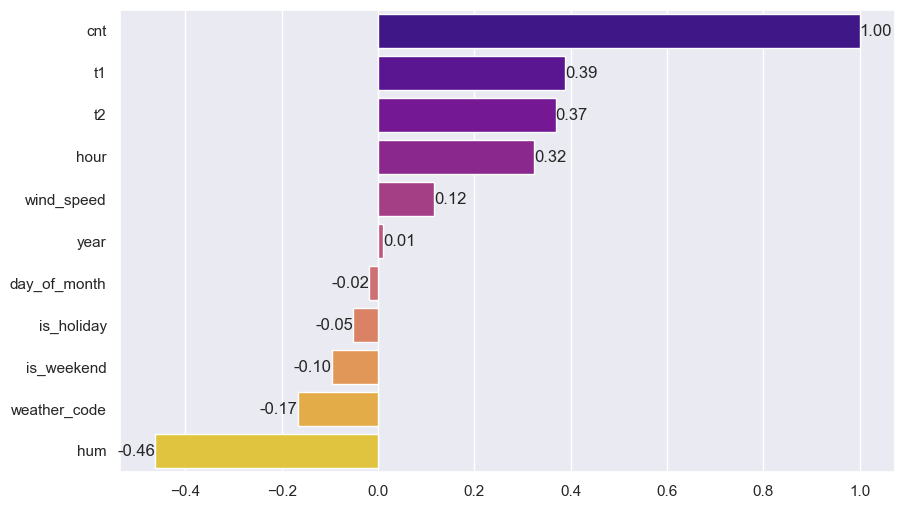

In [243]:
plt.figure(figsize=(10,6))

ax = sns.barplot(x = df.corr().iloc[:,0].sort_values(ascending = False).values,
                 y = df.corr().iloc[:,0].sort_values(ascending = False).index,
                 palette = "plasma")

for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f")

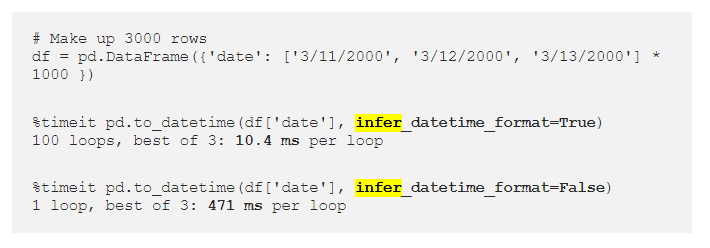

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

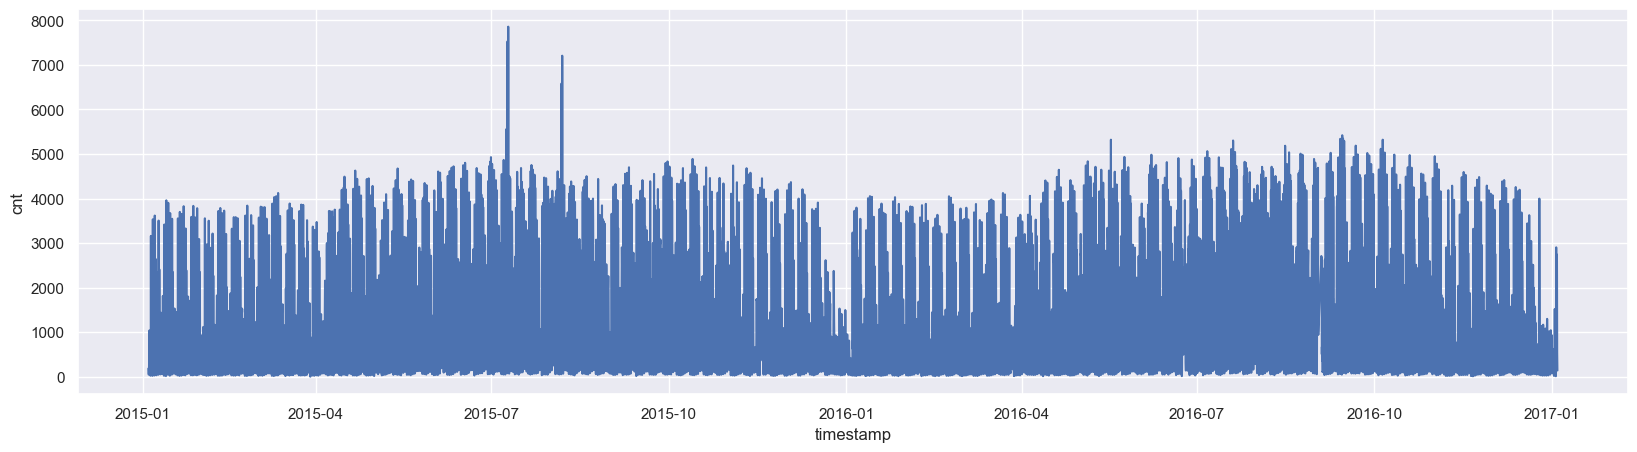

In [244]:
plt.figure(figsize = (20,5))
sns.lineplot(x = df.timestamp, y = df.cnt);

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

## Bike Shares by Months

In [245]:
df.groupby("month")["cnt"].mean()

month
Apr    1112.953408
Aug    1463.116577
Dec     845.516173
Feb     836.279617
Jan     784.691997
Jul    1543.696151
Jun    1383.354430
Mar     921.294959
May    1275.099462
Nov     965.867832
Oct    1217.546991
Sep    1356.597561
Name: cnt, dtype: float64

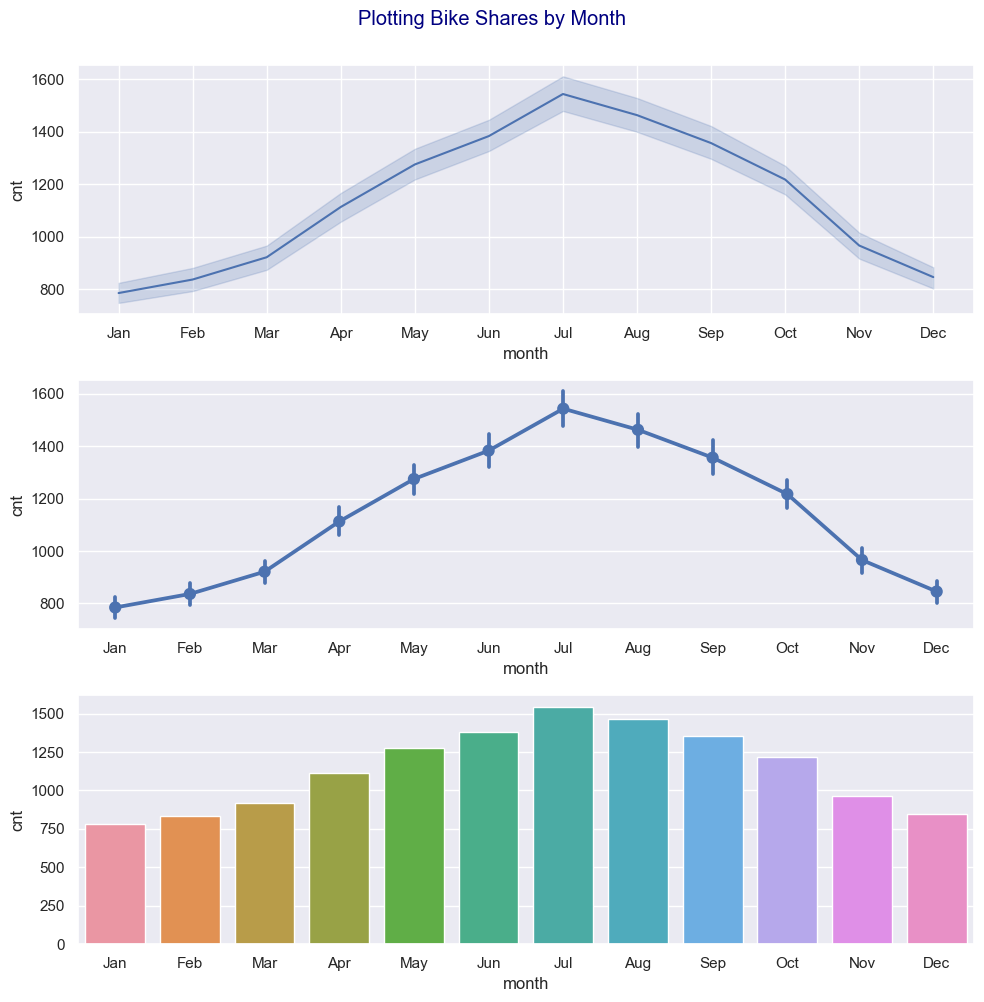

In [246]:
#LINEPLOT
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
sns.lineplot(df.month, y = df.cnt)

#POINTPLOT
plt.subplot(3,1,2)
sns.pointplot(df.month, y = df.cnt)

#BARPLOT
plt.subplot(3,1,3)
ax = sns.barplot(df.month, y = df.cnt, ci = None);


plt.suptitle("Plotting Bike Shares by Month", y = 1 , color='navy')
plt.tight_layout();

In [247]:
## According to graph the highest demand of bike on 7th month (July) 

### Bike Shares by Month over the Years

In [248]:
df_sum = pd.DataFrame(df.groupby("year_month")["cnt"].sum())
df_sum

,cnt
year_month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


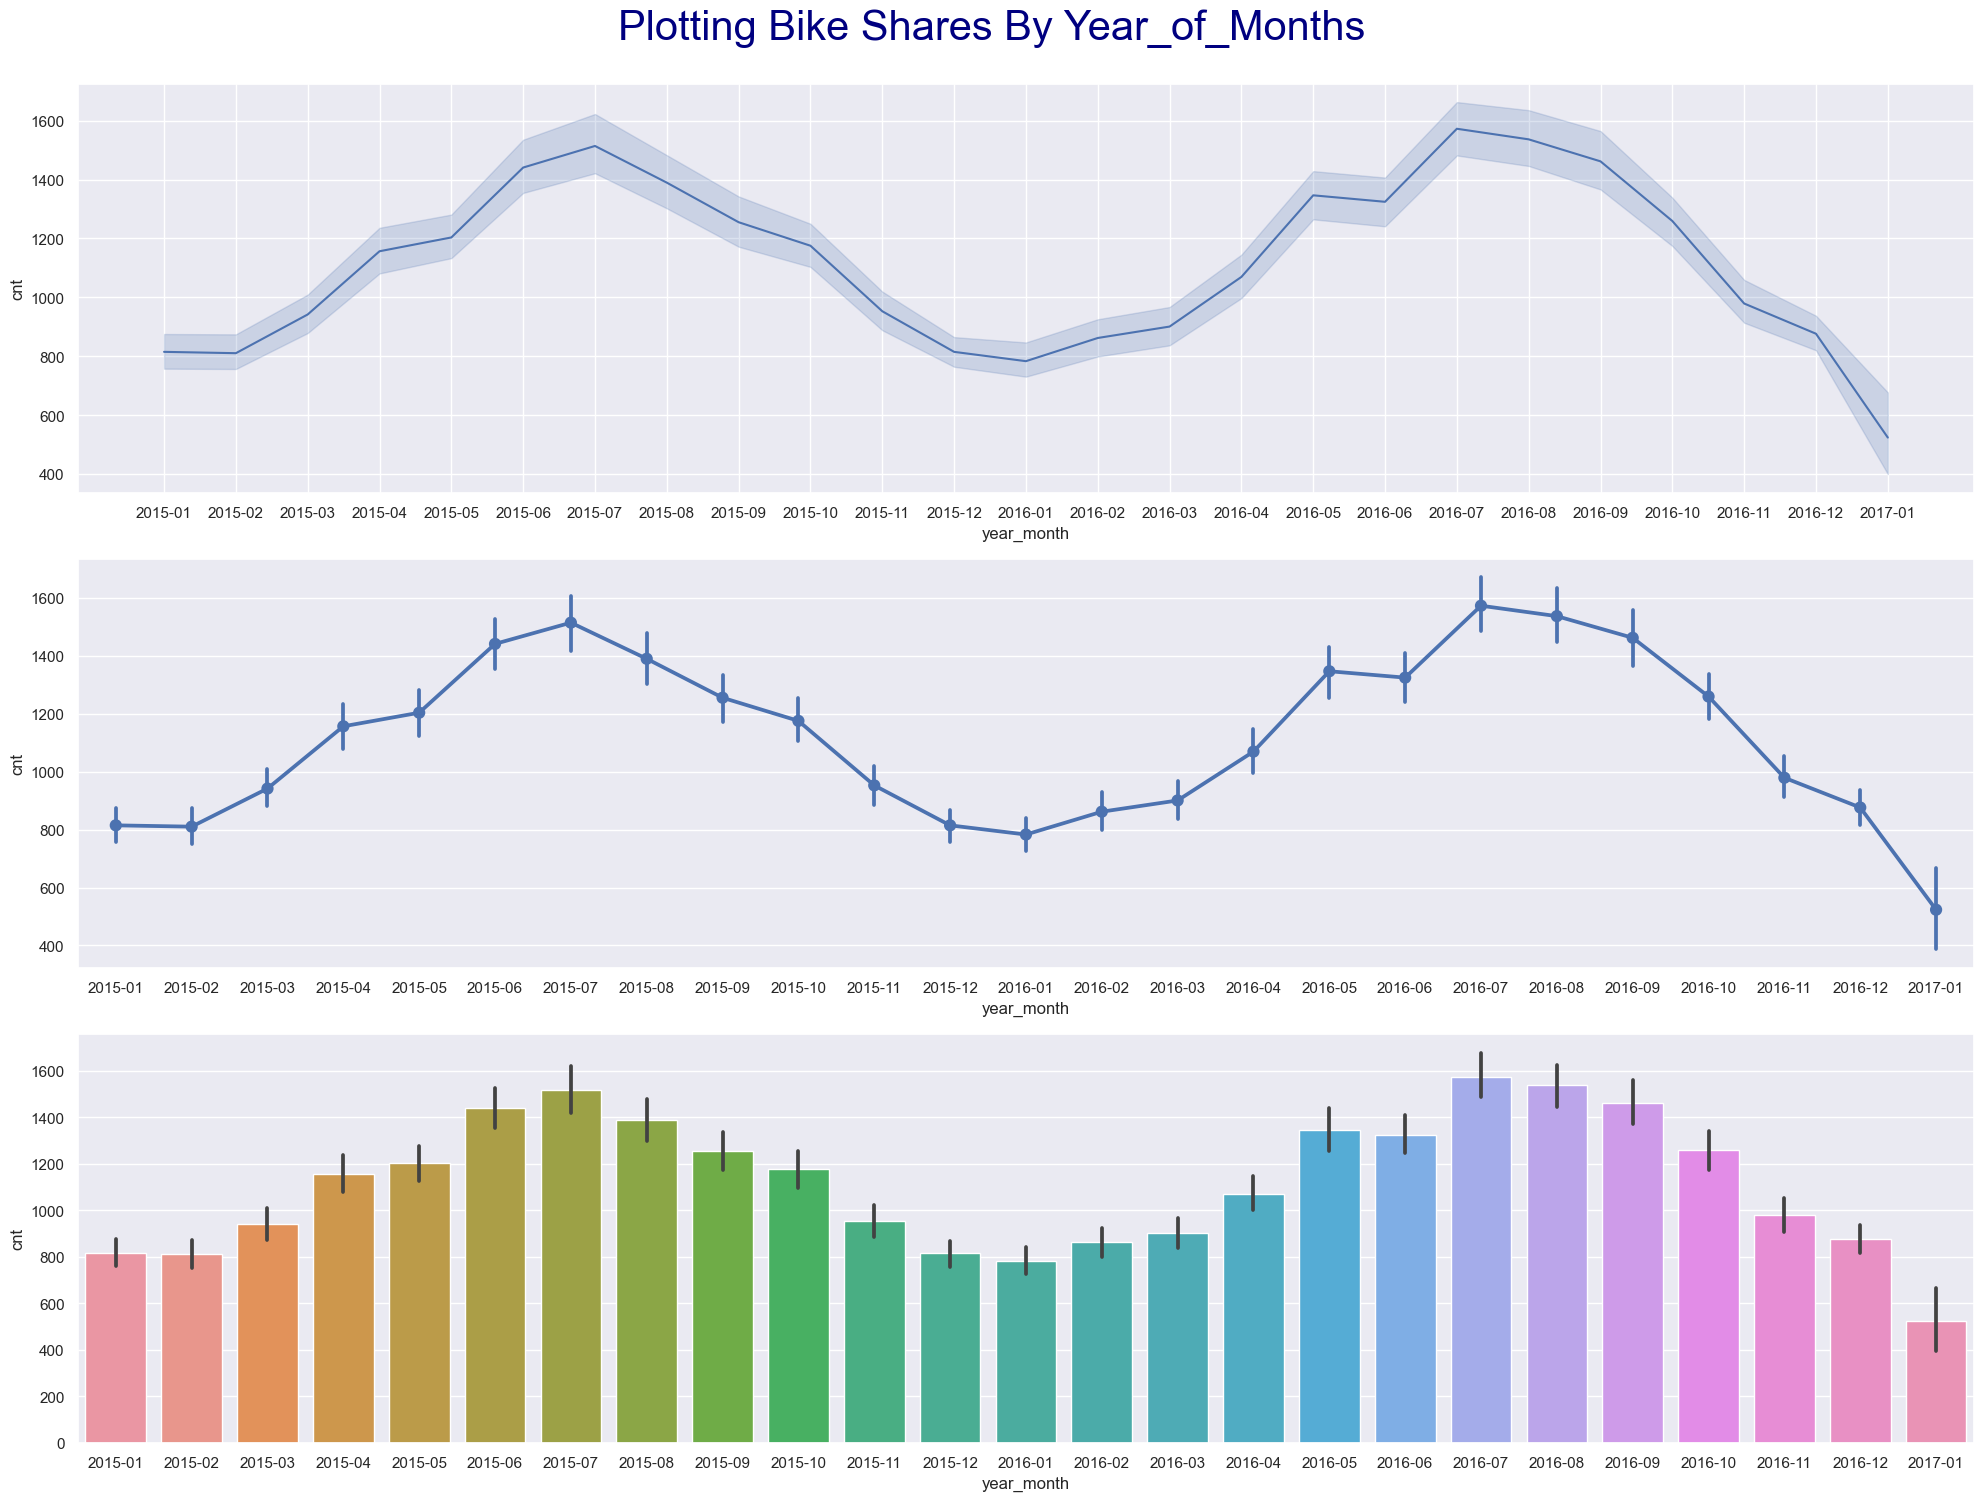

In [249]:
fig, ax = plt.subplots(nrows= 3, ncols = 1, figsize = (20,15))

fig.suptitle("Plotting Bike Shares By Year_of_Months", y = 1.0, fontsize = 30, color='navy')

sns.lineplot(x = df.year_month, y = df.cnt, ax = ax[0] )

sns.pointplot(x = df.year_month, y = df.cnt, ax = ax[1])

sns.barplot(x = df.year_month, y = df.cnt, ax = ax[2])

plt.tight_layout();

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

In [250]:
df.groupby("hour")["cnt"].mean()

hour
0      290.609116
1      200.631215
2      136.303745
3       94.245492
4       73.313454
5      110.707351
6      466.626722
7     1468.745179
8     2882.823204
9     1653.019257
10    1064.660690
11    1151.218707
12    1433.717421
13    1505.739011
14    1472.004121
15    1564.621399
16    1869.801370
17    2829.585165
18    2629.043956
19    1651.510316
20    1059.781293
21     741.249311
22     592.409655
23     439.652355
Name: cnt, dtype: float64

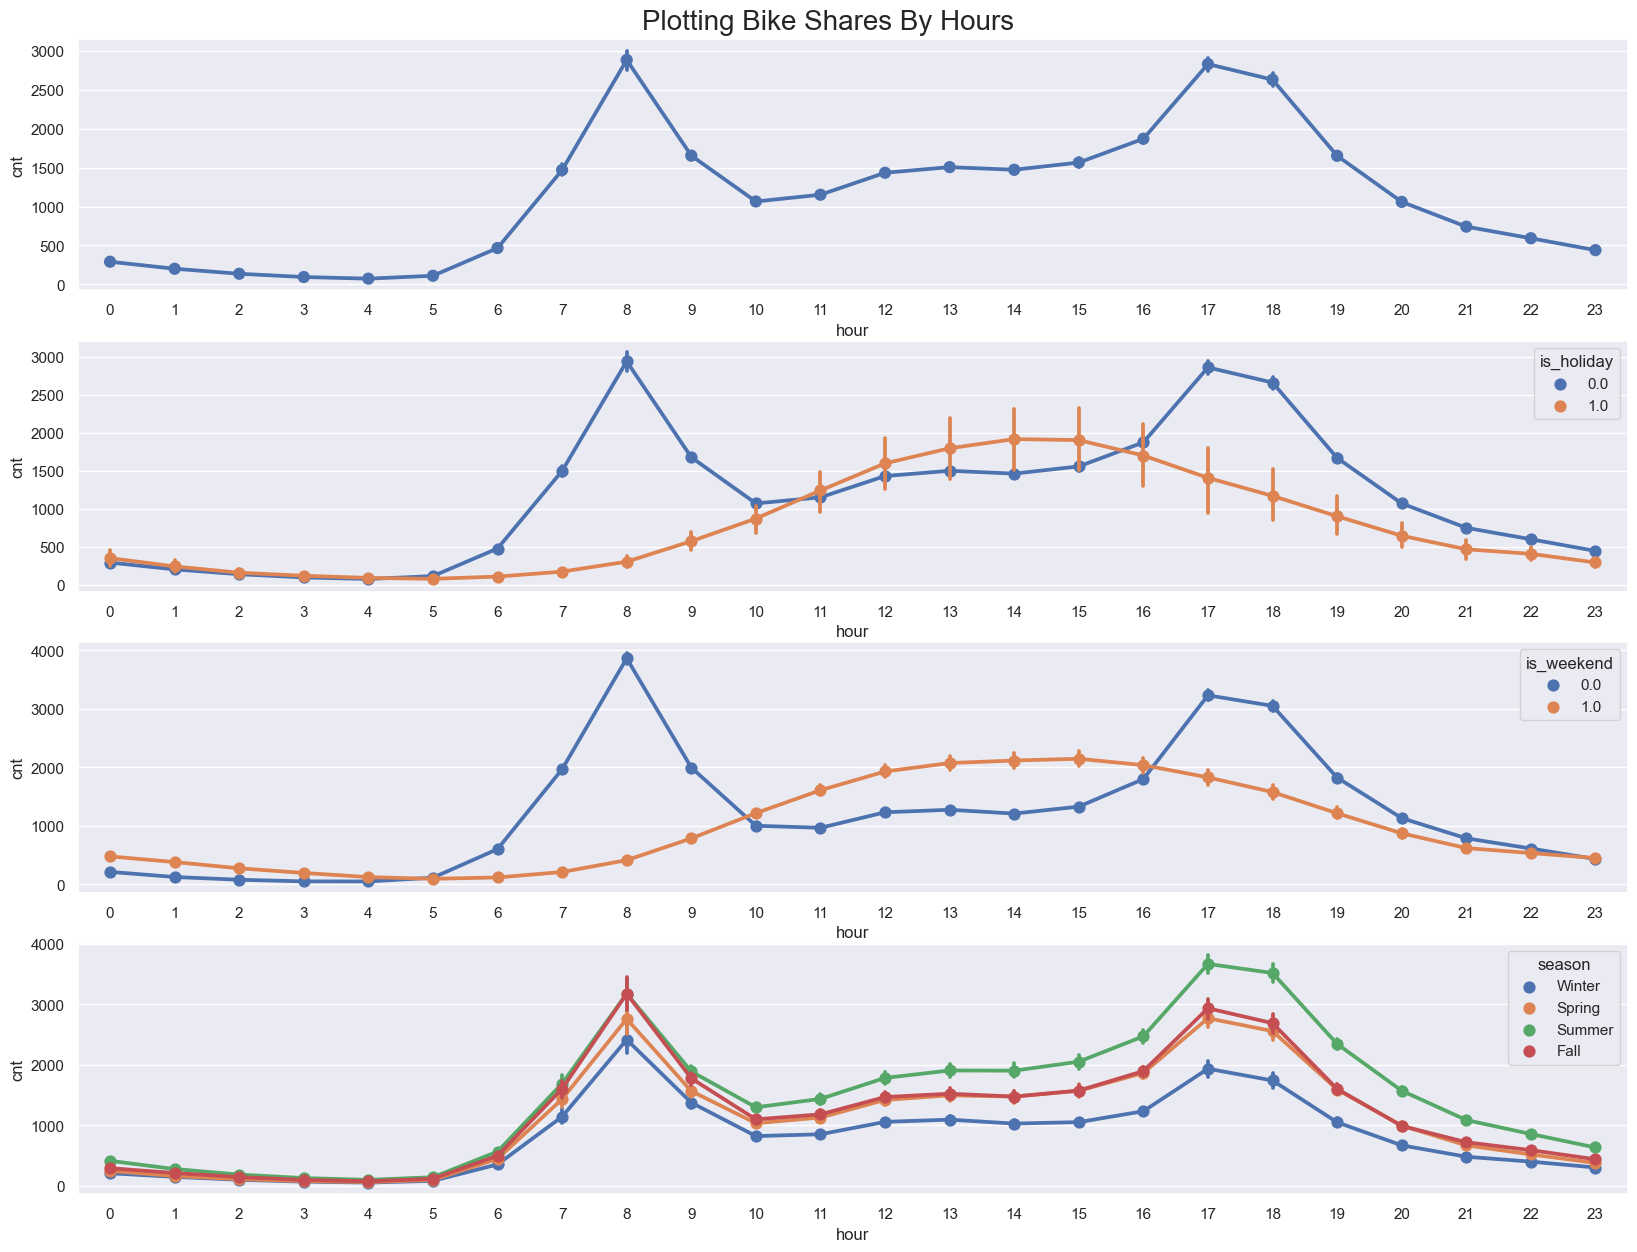

In [251]:
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (20,15)) #OMM
fig.suptitle("Plotting Bike Shares By Hours", y = 0.9, fontsize = 20)

sns.pointplot(data = df, x = "hour", y = "cnt", ax = ax[0])

sns.pointplot(data = df, x = "hour", y = "cnt", hue = "is_holiday", ax = ax[1])

sns.pointplot(data = df, x = "hour", y = "cnt", hue = "is_weekend", ax = ax[2])

sns.pointplot(data = df, x = "hour", y = "cnt", hue = "season", ax = ax[3])

plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

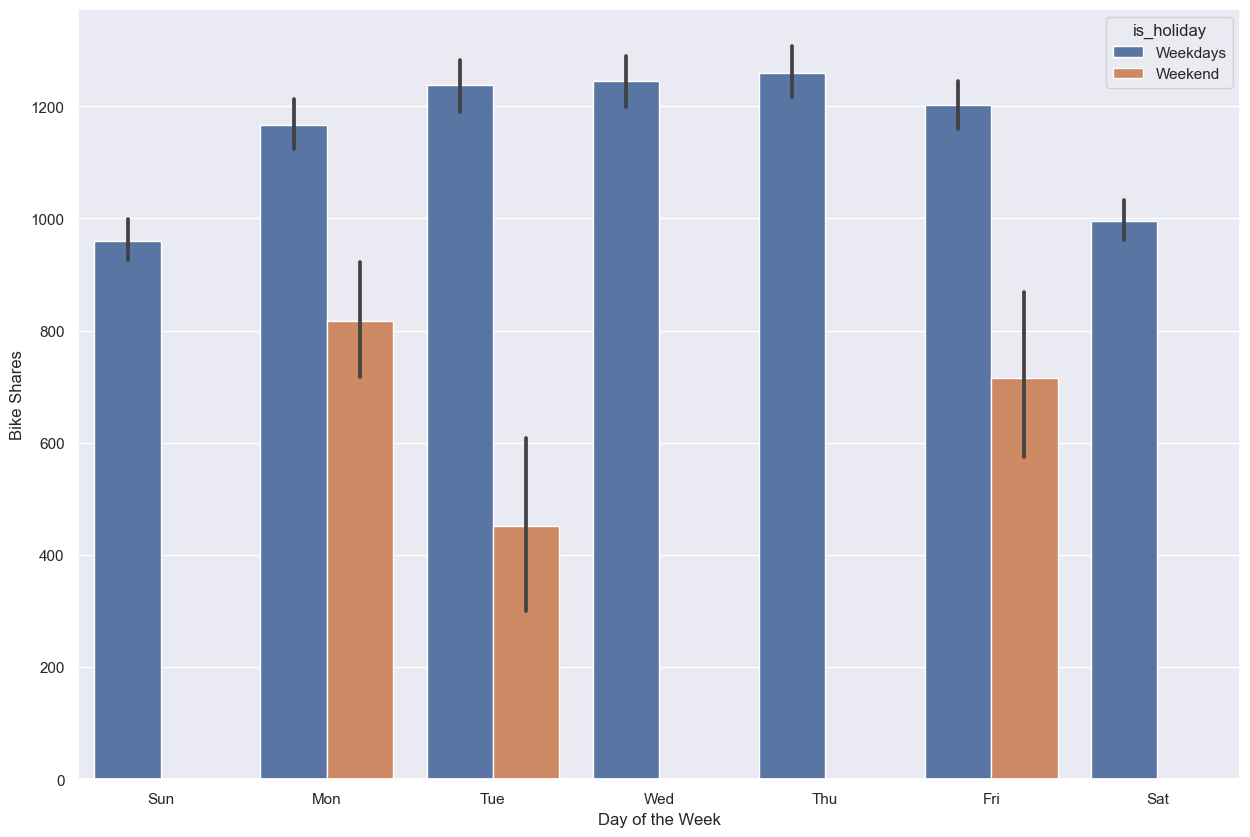

In [253]:
plt.figure(figsize=(15, 10))

sns.barplot(x=df.day_of_week,
            y=df.cnt,
            hue=df.is_holiday.apply(lambda x: 'Weekend' if x == 1 else 'Weekdays'))

plt.xlabel('Day of the Week')
plt.ylabel('Bike Shares');

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

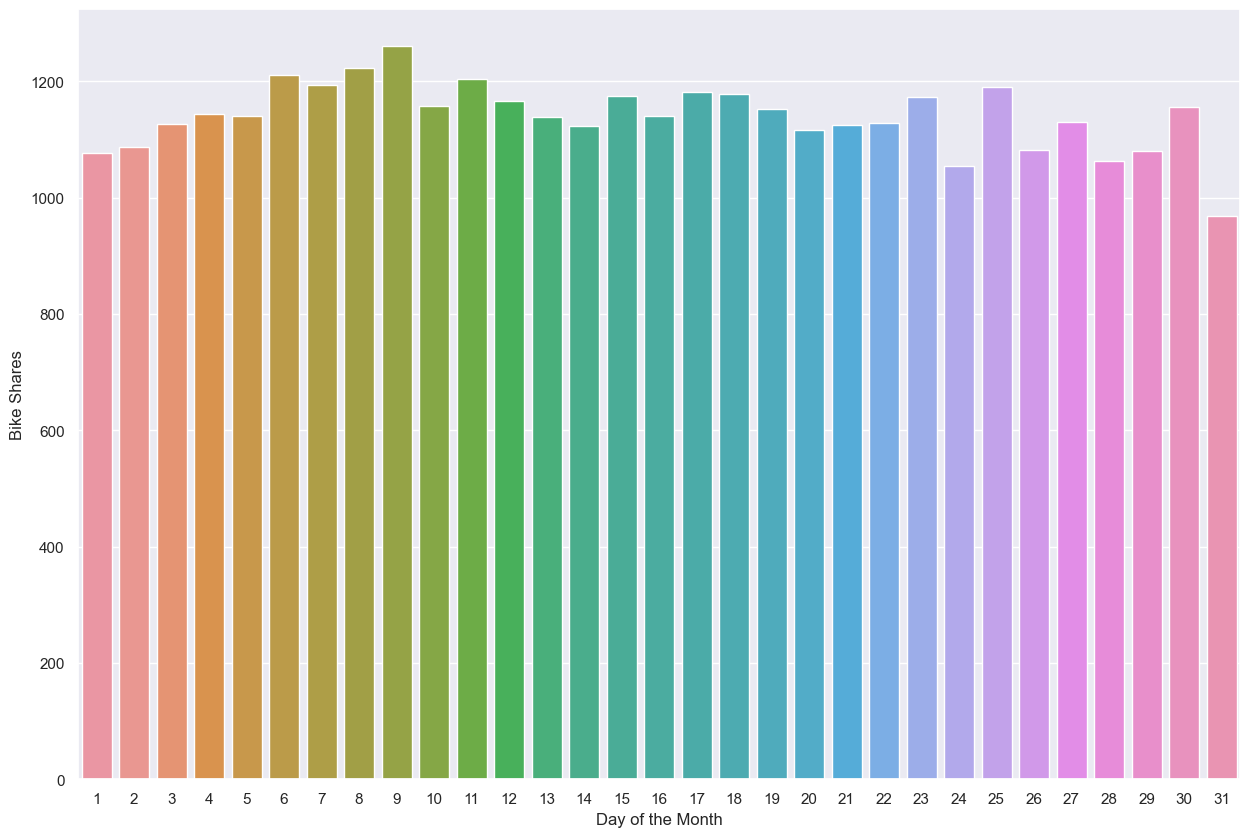

In [254]:
plt.figure(figsize=(15, 10))

sns.barplot(x=df.day_of_month,
            y=df.cnt ,data = df,ci= None)

plt.xlabel('Day of the Month')
plt.ylabel('Bike Shares');

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

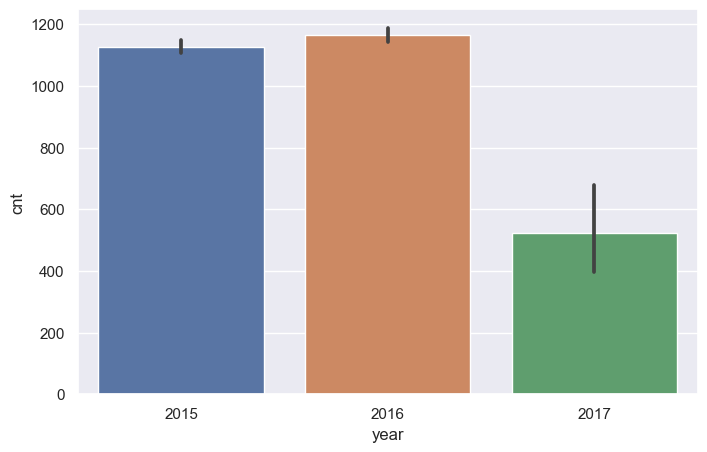

In [257]:
# with barplot
plt.figure(figsize=(8,5))
sns.barplot(x = df.year, y = df.cnt);

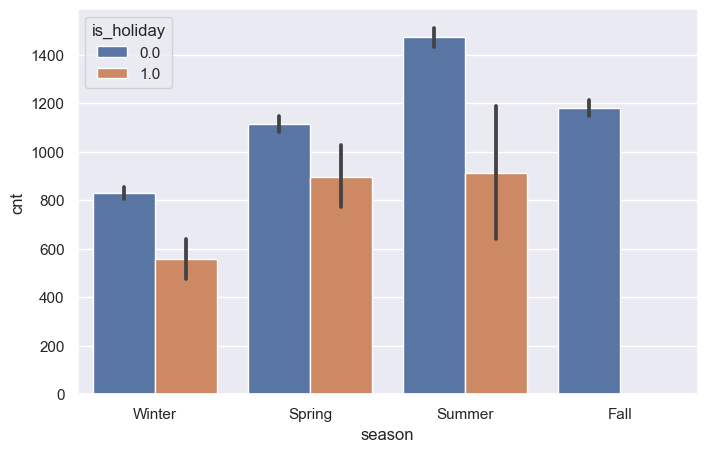

In [258]:
# with barplot
plt.figure(figsize = (8,5))

sns.barplot(x = df.season, 
            y = df.cnt, 
            hue = df.is_holiday);

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

In [259]:
df['is_weekend'].value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

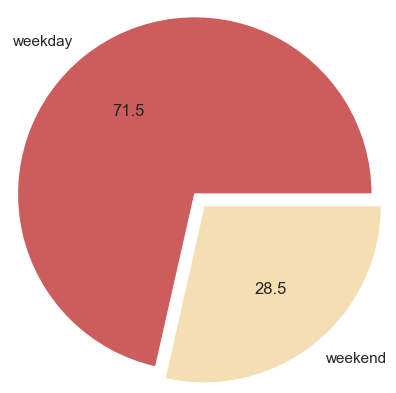

In [260]:
plt.pie(df['is_weekend'].value_counts(), 
        labels=['weekday', 'weekend'], 
        autopct="%.1f",
        explode = [0, 0.1],
       colors = ["indianred", "wheat"],
        radius=1.2);

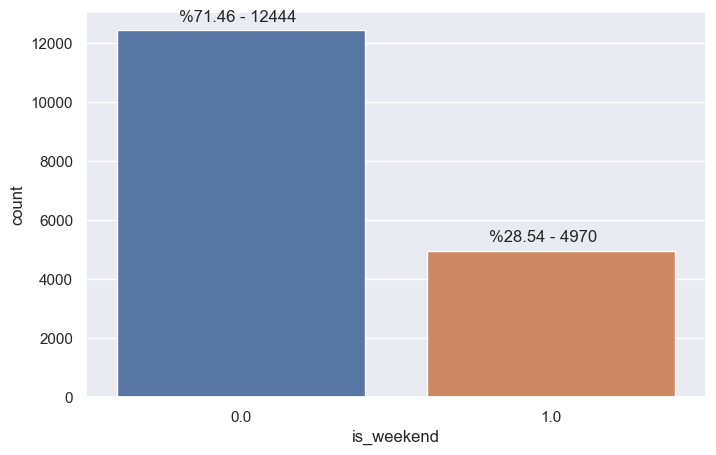

In [261]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='is_weekend',data=df)
for bar in ax.patches:
    ax.annotate("%" + str(round(100*bar.get_height()/len(df), 2)) + ' - ' + str(bar.get_height() ),
                (bar.get_x()+0.2, bar.get_height()+300),
                size=12)

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

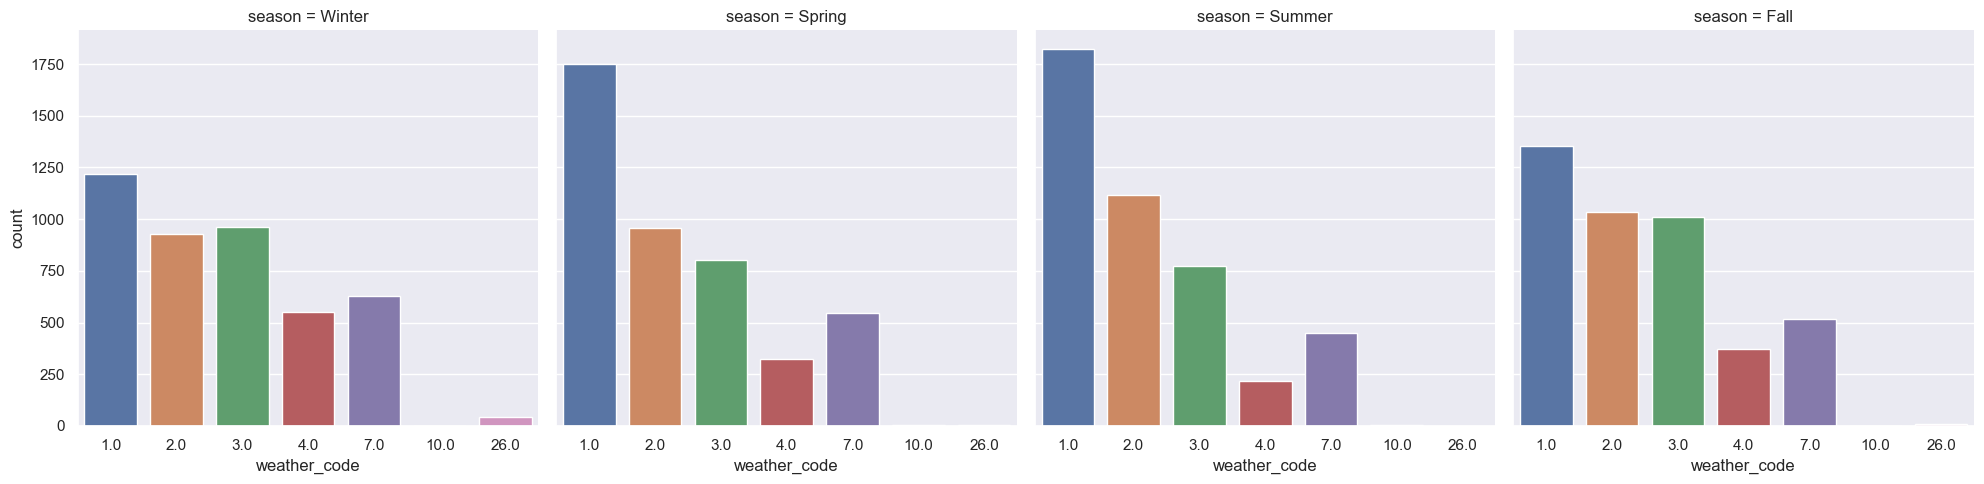

In [262]:
sns.catplot(x = "weather_code", 
            col = "season", 
            col_wrap = 4, 
            data = df, 
            kind = "count")

plt.tight_layout();

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

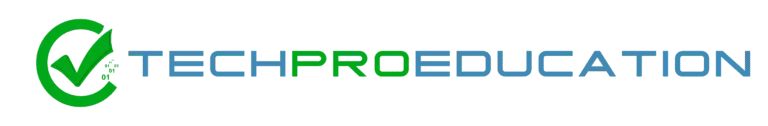